<a href="https://colab.research.google.com/github/Richard-Santosp/Restaurant-Sales-report/blob/main/Restaurant_Sales_report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Descrição :**

#### (Dados retirados do site Kaggle: https://www.kaggle.com/datasets/rajatsurana979/fast-food-sales-report/data)

Este conjunto de dados captura transações de vendas de um restaurante local perto da minha casa. Ele inclui detalhes como o ID do pedido, data da transação, nomes dos itens (representando vários itens de alimentos e bebidas), tipos de itens (categorizados como Fast-food ou Bebidas), preços dos itens, quantidades pedidas, valores da transação, tipos de transação (dinheiro, online ou outros), o gênero do funcionário que recebeu o pedido e o horário da venda (Manhã, Noite, Tarde, Noite, Meia-noite). O conjunto de dados oferece um instantâneo valioso das operações diárias do restaurante e do comportamento do cliente.

# Objetivo :

*Analisando tendências de vendas ao longo do tempo.*

##A análise será dividida na seguintes etapas:

* Extração dos dados
* Limpeza e tratamento dos dados
* Explorar dos dados
* Transformar os dados
* Interpretar os dados
* Comunicar insights


###Para iniciar a análise, irei fazer o import da lib pandas e extrair os dados de um arquivo csv localizado na nuvem, apresentando as 10 primeiras linhas da tabela e todas as colunas

# Extração



In [629]:
import pandas as pd

dados = pd.read_csv("/content/drive/MyDrive/Data Analysis/Restaurant Sales report/Vendas_Balaji_Comida_Rapida_Traduzido.csv")
display(dados.head(10))

,id_pedido,data,nome_item,tipo_item,preco_item,quantidade,valor_transacao,tipo_transacao,recebido_por,horario_venda
0,1,07-03-2022,Aalopuri,Comida Rápida,20,13,260,NaN,Sr.,Noite
1,2,8/23/2022,Pão de Batata,Comida Rápida,20,15,300,Dinheiro,Sr.,Tarde
2,3,11/20/2022,Pão de Batata,Comida Rápida,20,1,20,Dinheiro,Sr.,Tarde
3,4,02-03-2023,Suco de Cana,Bebidas,25,6,150,Online,Sr.,Noite
4,5,10-02-2022,Suco de Cana,Bebidas,25,8,200,Online,Sr.,Noite
5,6,11/14/2022,Pão de Batata,Comida Rápida,20,10,200,Dinheiro,Sr.,Noite
6,7,05-03-2022,Suco de Cana,Bebidas,25,9,225,Dinheiro,Sr.,Noite
7,8,12/22/2022,Panipuri,Comida Rápida,20,14,280,Online,Sr.,Noite
8,9,06-10-2022,Panipuri,Comida Rápida,20,1,20,Dinheiro,Mrs.,Morning
9,10,9/16/2022,Panipuri,Comida Rápida,20,5,100,Online,Sr.,Tarde


# Limpeza e tratamento dos dados

Com base nos motivos de nossa análise, as colunas id_pedido e recebido_por não serão relevantes, então podemos tirar elas para que os dados sejam mais objetivos. E alêm disso podemos alterar o nome de diversas colunas para ficar mas intuitivo

In [630]:
dados = dados.drop(['id_pedido', 'recebido_por'], axis=1)
dados = dados.rename(columns={'nome_item': 'Produto'})
dados = dados.rename(columns={'tipo_item': 'Categoria'})
dados = dados.rename(columns={'preco_item': 'Preco'})
dados = dados.rename(columns={'horario_venda': 'Periodo'})

Com isso podemos observar os dados pertencentes à tabela. De inicio podemos perceber uma falta de padronização na coluna 'data', o que pode dificultar a análise com base no tempo. Para mais informações não somente das datas mas de todos os dados podemos consultar o tipo de dados que cada coluna esta armazenando.

In [631]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   data             1000 non-null   object
 1   Produto          1000 non-null   object
 2   Categoria        1000 non-null   object
 3   Preco            1000 non-null   int64 
 4   quantidade       1000 non-null   int64 
 5   valor_transacao  1000 non-null   int64 
 6   tipo_transacao   893 non-null    object
 7   Periodo          1000 non-null   object
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


Podemos observar que a coluna de data armazena valores do tipo object. Para que a gente possa manipular e padrnizar tais dados, devemos formatar eles para o tipo datetime, da seguinte forma:

In [632]:
# Padronizando e substituindo os separados de '-' para '/'
dados['data'] = dados['data'].str.replace('-', '/')

#convertendo os dados de object para datetime
dados['data'] = pd.to_datetime(dados['data'])

dados.info()
display(dados.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   data             1000 non-null   datetime64[ns]
 1   Produto          1000 non-null   object        
 2   Categoria        1000 non-null   object        
 3   Preco            1000 non-null   int64         
 4   quantidade       1000 non-null   int64         
 5   valor_transacao  1000 non-null   int64         
 6   tipo_transacao   893 non-null    object        
 7   Periodo          1000 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(4)
memory usage: 62.6+ KB


,data,Produto,Categoria,Preco,quantidade,valor_transacao,tipo_transacao,Periodo
0,2022-07-03,Aalopuri,Comida Rápida,20,13,260,NaN,Noite
1,2022-08-23,Pão de Batata,Comida Rápida,20,15,300,Dinheiro,Tarde
2,2022-11-20,Pão de Batata,Comida Rápida,20,1,20,Dinheiro,Tarde
3,2023-02-03,Suco de Cana,Bebidas,25,6,150,Online,Noite
4,2022-10-02,Suco de Cana,Bebidas,25,8,200,Online,Noite


Agora que foram convertidos para o tipo datetime, podemos manipular as datas para que fiquem no padrão brasileiro, dia/mês/ano

In [633]:
dados['data'] = dados['data'].dt.strftime('%m/%d/%Y')

display(dados.head(10))

,data,Produto,Categoria,Preco,quantidade,valor_transacao,tipo_transacao,Periodo
0,07/03/2022,Aalopuri,Comida Rápida,20,13,260,NaN,Noite
1,08/23/2022,Pão de Batata,Comida Rápida,20,15,300,Dinheiro,Tarde
2,11/20/2022,Pão de Batata,Comida Rápida,20,1,20,Dinheiro,Tarde
3,02/03/2023,Suco de Cana,Bebidas,25,6,150,Online,Noite
4,10/02/2022,Suco de Cana,Bebidas,25,8,200,Online,Noite
5,11/14/2022,Pão de Batata,Comida Rápida,20,10,200,Dinheiro,Noite
6,05/03/2022,Suco de Cana,Bebidas,25,9,225,Dinheiro,Noite
7,12/22/2022,Panipuri,Comida Rápida,20,14,280,Online,Noite
8,06/10/2022,Panipuri,Comida Rápida,20,1,20,Dinheiro,Morning
9,09/16/2022,Panipuri,Comida Rápida,20,5,100,Online,Tarde


# Exploração

Agora que ja realizamos toda a limpeza dos dado, podemos iniciar a etapa de exploração, onde iremos explorar os dados de acordo com as informações de desejamos obter, sendo a primeira: Analisando tendências de vendas ao longo do tempo.

Para isso é interessante criarmos duas novas coluna que referencia o mes e o ano da venda, para que passamos ter um controle das vendas dos produtos mes a mes em cada ano.

In [634]:
dados['data'] = pd.to_datetime(dados['data'])

In [635]:
dados.info()
dados['mes'] = dados['data'].dt.month
dados['ano'] = dados['data'].dt.year

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   data             1000 non-null   datetime64[ns]
 1   Produto          1000 non-null   object        
 2   Categoria        1000 non-null   object        
 3   Preco            1000 non-null   int64         
 4   quantidade       1000 non-null   int64         
 5   valor_transacao  1000 non-null   int64         
 6   tipo_transacao   893 non-null    object        
 7   Periodo          1000 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(4)
memory usage: 62.6+ KB


Podemos ver que nos dados abordamos dois anos, o de 2022 e o de 2023

In [636]:
teste = dados['ano'].value_counts()
display(teste)

,count
ano,
2022,746
2023,254


Agora podemos agrupar os dados para verificar quanto cada produto vendeu em cada ano e quanto foi vendido mês a mês também

In [637]:
dados_2022 = dados[dados['data'].dt.year == 2022]
qtd_categoria_2022 =  dados_2022['Categoria'].value_counts()

dados_2023 = dados[dados['data'].dt.year == 2023]
qtd_categoria_2023 =  dados_2023['Categoria'].value_counts()

display(qtd_categoria_2022, qtd_categoria_2023)

agrupando_Categoria_ano_mes = dados.groupby(['ano', 'mes', 'Categoria']).size().reset_index(name='Quantidade')
agrupando_ano_mes = dados.groupby(['ano', 'mes']).size().reset_index(name='Quantidade')

display(agrupando_Categoria_ano_mes, agrupando_ano_mes)

,count
Categoria,
Comida Rápida,508
Bebidas,238


,count
Categoria,
Comida Rápida,178
Bebidas,76


,ano,mes,Categoria,Quantidade
0,2022,4,Bebidas,16
1,2022,4,Comida Rápida,50
2,2022,5,Bebidas,30
3,2022,5,Comida Rápida,70
4,2022,6,Bebidas,19
5,2022,6,Comida Rápida,49
6,2022,7,Bebidas,24
7,2022,7,Comida Rápida,55
8,2022,8,Bebidas,32
9,2022,8,Comida Rápida,58


,ano,mes,Quantidade
0,2022,4,66
1,2022,5,100
2,2022,6,68
3,2022,7,79
4,2022,8,90
5,2022,9,73
6,2022,10,98
7,2022,11,82
8,2022,12,90
9,2023,1,90


Depois de criar essas novas colunas podemos utilizar um gráfico de colunas para comparar a quantidade de bebidas e comidas vendidas

In [638]:
import plotly.express as px

filtro = dados[dados['Categoria'].isin(['Comida Rápida', 'Bebidas'])]

dados_agrupados = filtro.groupby(['ano','mes', 'Categoria']).agg({'quantidade':'sum'}).reset_index()

grafico = px.bar(
    dados_agrupados,
    x='mes',
    y='quantidade',
    color='Categoria',
    title='Comparação de venda de tipos de produtos mes a mes',
    labels={'quantidade': 'Quantidade Vendida', 'mes':'Mês', 'Categoria':'Tipo de Item'},
    color_discrete_map={'Comida Rápida':"tomato", 'Bebidas':'blue'},
    facet_col='ano'
)

grafico.show()

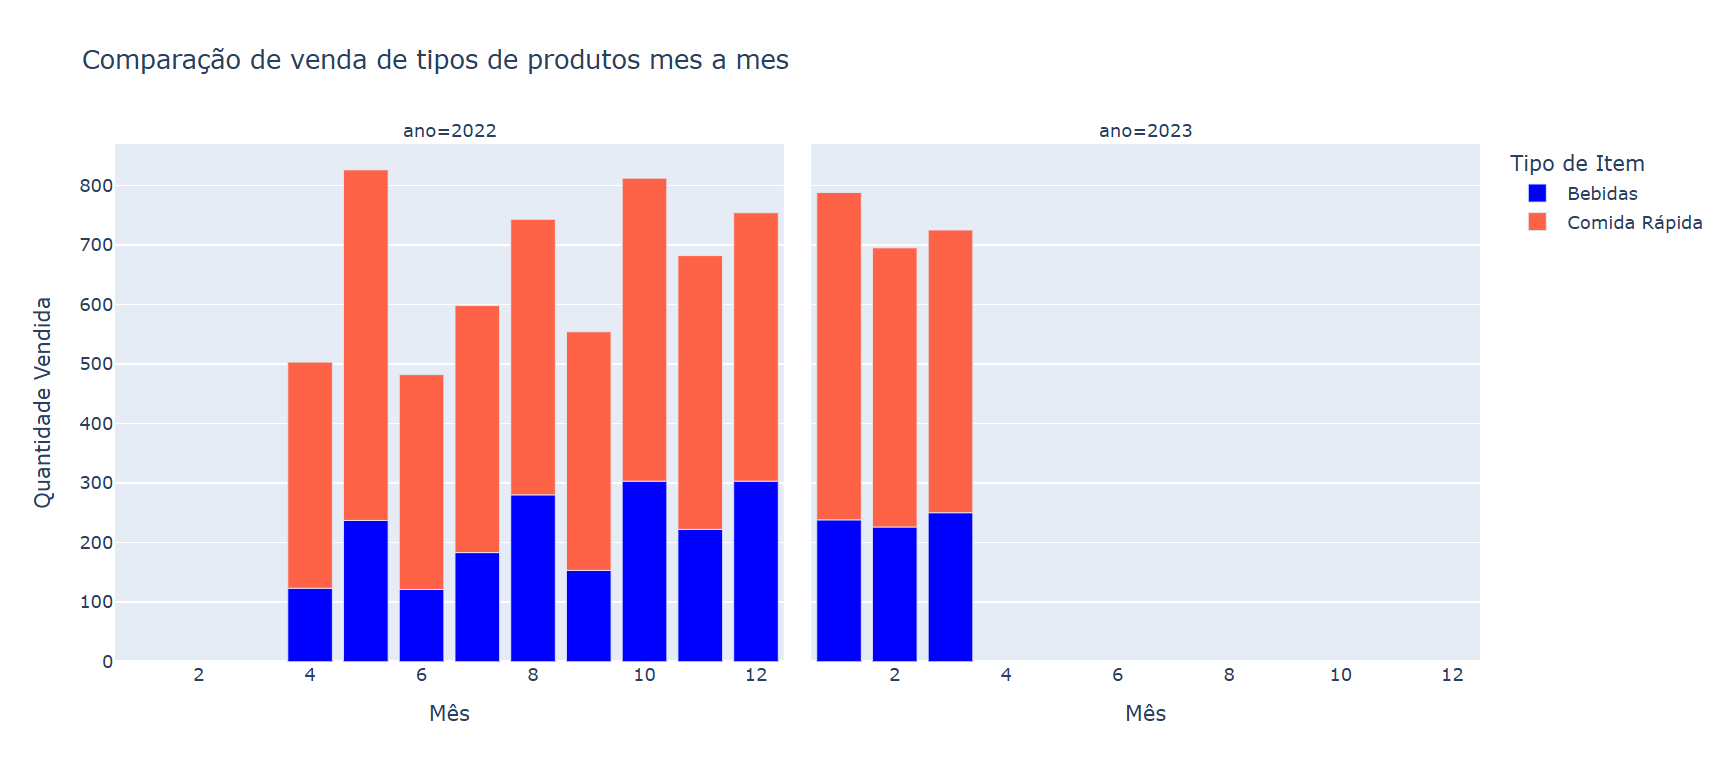

O ultimo mês verificado é o de Março de 2023, e podemos notar que no mês de abril de 2022 foi o segundo mês com o menor número de vendas. Esse é um ponto a se destacar que vamos analisar de forma mais profunda mais à frente.

In [639]:
qtd_categoria_2022 = dados_2022['Categoria'].value_counts()
display(qtd_categoria_2022)

qtd_categoria_2023 = dados_2023['Categoria'].value_counts()
display(qtd_categoria_2023)

qtd_categoria_2022 = dados_2022['Categoria'].value_counts(normalize=True)
qtd_categoria_2023 = dados_2023['Categoria'].value_counts(normalize=True)

bebida_porc_2022 = qtd_categoria_2022.Bebidas*100
comida_porc_2022 = qtd_categoria_2022['Comida Rápida']*100

bebida_porc_2023 = qtd_categoria_2023.Bebidas*100
comida_porc_2023 = qtd_categoria_2023['Comida Rápida']*100

print(f'Porcentagem de comida vendida em 2022: {comida_porc_2022.round(1)}%\nPorcentagem de bebida vendida em 2022: {bebida_porc_2022.round(1)}')
print(f'\nPorcentagem de comida vendida em 2023: {comida_porc_2023.round(1)}%\nPorcentagem de bebida vendida em 2023: {bebida_porc_2023.round(1)}')

,count
Categoria,
Comida Rápida,508
Bebidas,238


,count
Categoria,
Comida Rápida,178
Bebidas,76


Porcentagem de comida vendida em 2022: 68.1%
Porcentagem de bebida vendida em 2022: 31.9

Porcentagem de comida vendida em 2023: 70.1%
Porcentagem de bebida vendida em 2023: 29.9


Como podemos ver a venda de comida é muito superior à venda de bebidas, em todos os meses dos dois anos, muitas vezes sendo quase 3 vezes maior. Com base nisso podemos varificar a diferença e porcentagem de lucro em cima de cada categoria.

In [640]:
lucros_categoria_por_mês = dados.groupby(['ano','mes', 'Categoria'])['valor_transacao'].sum().reset_index()
lucros_por_mês = dados.groupby(['ano','mes'])['valor_transacao'].sum().reset_index()
display(lucros_categoria_por_mês, lucros_por_mês)

,ano,mes,Categoria,valor_transacao
0,2022,4,Bebidas,4140
1,2022,4,Comida Rápida,13530
2,2022,5,Bebidas,7680
3,2022,5,Comida Rápida,18890
4,2022,6,Bebidas,3715
5,2022,6,Comida Rápida,13620
6,2022,7,Bebidas,5490
7,2022,7,Comida Rápida,14000
8,2022,8,Bebidas,9265
9,2022,8,Comida Rápida,13040


,ano,mes,valor_transacao
0,2022,4,17670
1,2022,5,26570
2,2022,6,17335
3,2022,7,19490
4,2022,8,22305
5,2022,9,18640
6,2022,10,27205
7,2022,11,22900
8,2022,12,23460
9,2023,1,28670


Podemos analisar esses dados de forma mais eficiente em um gráfico

In [641]:
grafico_valores = px.line(lucros_categoria_por_mês,
                          x='mes',
                          y='valor_transacao',
                          color='Categoria',
                          title="Valores atingigos mes a mes e cada categoria",
                          labels={'valor_transacao':'Valor', 'mes':'Mês', 'Categoria':'Tipo de item'},
                          color_discrete_map={'Comida Rápida':'tomato', 'Bebidas':'blue'},
                          facet_col='ano'
                          )

grafico_valores.show()

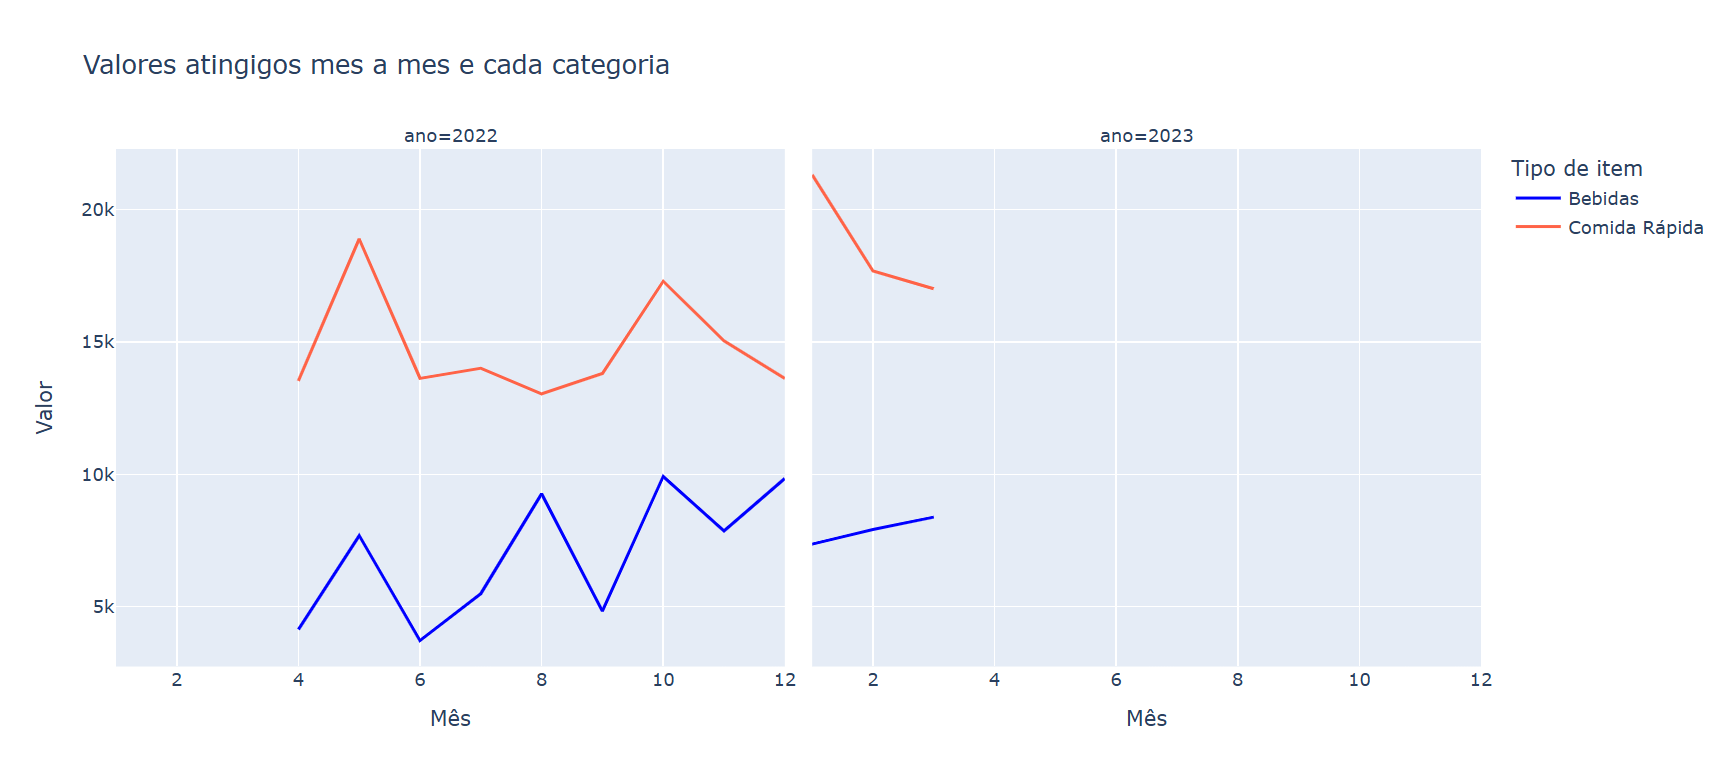

Comparando os dois gráfico podemos verificar dois pontos de atenção, os mesês 4 e 6 que são os dois meses com menos venda, e menos lucro. Vamos analisar eles um pouco melhor


In [642]:
diferenca_lucro_mes_4 = ((lucros_por_mês.valor_transacao[0] - lucros_por_mês.valor_transacao.mean())/lucros_por_mês.valor_transacao.mean())*100
diferenca_lucro_mes_6 = ((lucros_por_mês.valor_transacao[2] - lucros_por_mês.valor_transacao.mean())/lucros_por_mês.valor_transacao.mean())*100
print(f'Lucro\nO mês 4 lucra {diferenca_lucro_mes_4.round(1)}% a menos que a média dos meses\nO mês 6 lucra {diferenca_lucro_mes_6.round(1)}% a menos que a média dos meses\n')

diferenca_vendas_mes_4 = ((agrupando_ano_mes.Quantidade[0] - agrupando_ano_mes.Quantidade.mean())/agrupando_ano_mes.Quantidade.mean())*100
diferenca_vendas_mes_6 = ((agrupando_ano_mes.Quantidade[2] - agrupando_ano_mes.Quantidade.mean())/agrupando_ano_mes.Quantidade.mean())*100
print(f'Vendas\nO mês 4 vende {diferenca_vendas_mes_4.round(1)}% a menos que a média dos meses\nO mês 6 vende {diferenca_vendas_mes_6.round(1)}% a menos que a média dos meses')


Lucro
O mês 4 lucra -23.0% a menos que a média dos meses
O mês 6 lucra -24.4% a menos que a média dos meses

Vendas
O mês 4 vende -20.8% a menos que a média dos meses
O mês 6 vende -18.4% a menos que a média dos meses


Ambos os meses estão 1/4 a baixo da media de lucro dos meses e aproximadamente 1/5 abaixo da quantidade media de vendas

Vamos nos aprofundar nesse problema e verificar quais são os produtos vendidos nos meses e focar expecificamente nesses dois meses.

In [643]:
total_produto_vendido_ind = dados.groupby(['Produto','Categoria'])['valor_transacao'].sum().reset_index()
display(total_produto_vendido_ind)

,Produto,Categoria,valor_transacao
0,Aalopuri,Comida Rápida,20880
1,Cold coffee,Bebidas,54440
2,Frankie,Comida Rápida,57500
3,Panipuri,Comida Rápida,24520
4,Pão de Batata,Comida Rápida,20120
5,Sandwich,Comida Rápida,65820
6,Suco de Cana,Bebidas,31950


In [644]:
grafico_produtos = px.bar(total_produto_vendido_ind,
                          x='Produto',
                          y='valor_transacao',
                          color='Produto')
grafico_produtos.show()

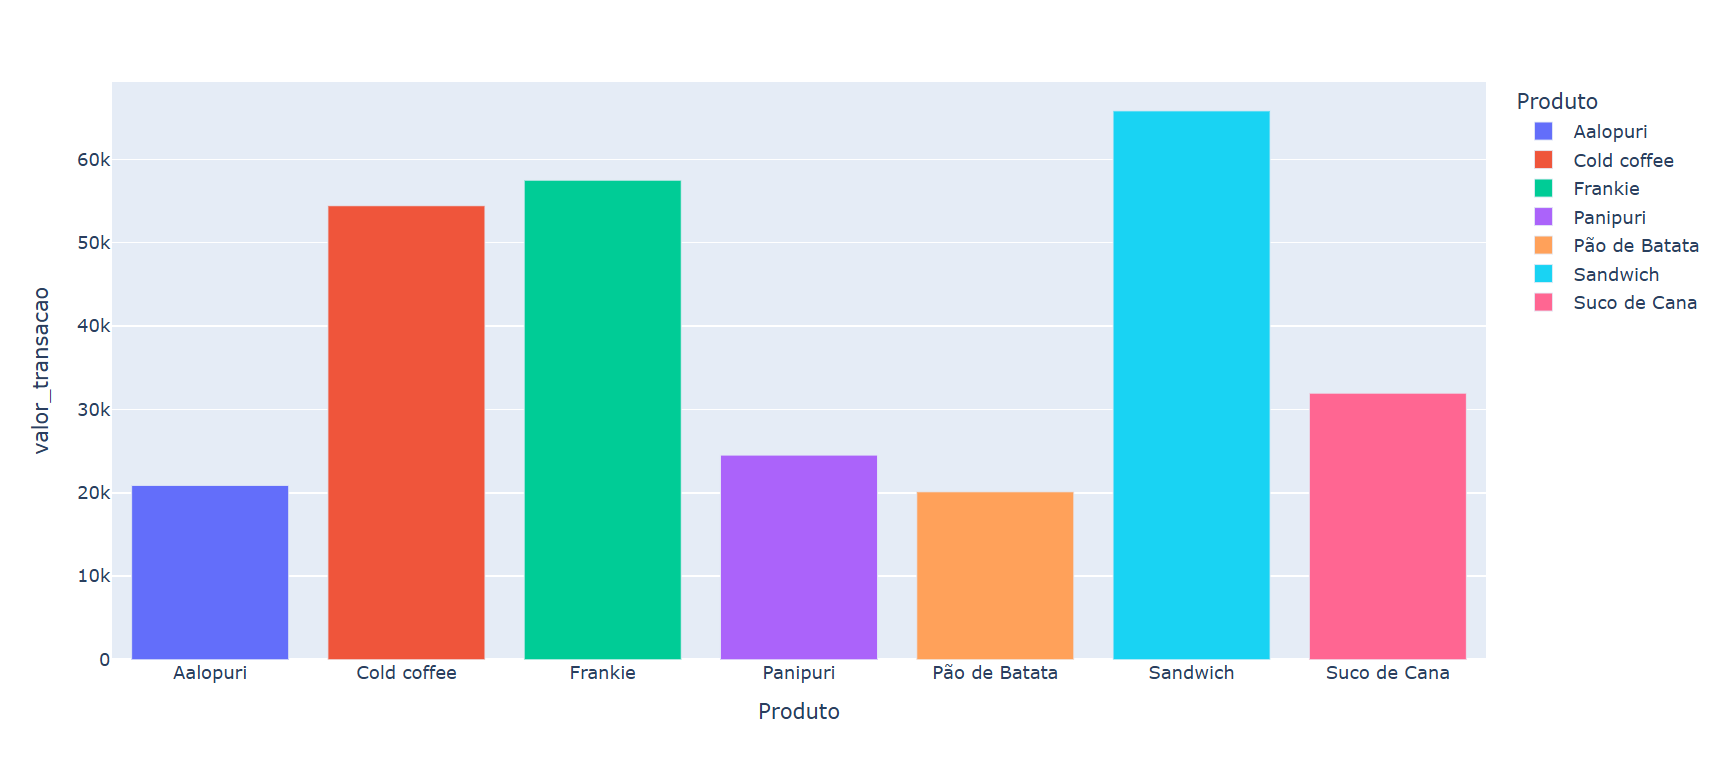

Podemos ver que Cold coffee, Frankie e o Sandwich são disparados os mas vendidos.

In [645]:
soma_maiores_vendas = total_produto_vendido_ind.loc[[1,2,5], 'valor_transacao'].sum()
soma_vendas_restates = total_produto_vendido_ind.loc[[0,3,4,6], 'valor_transacao'].sum()

dados_graficos = pd.DataFrame({
    'Grupo':['Maiores vendas', 'Vendas Restantes'],
    'Valor':[soma_maiores_vendas, soma_vendas_restates]
})
comparacao_vendas_produtos = px.bar(dados_graficos,
                                    x='Grupo',
                                    y='Valor',
                                    color='Grupo',
                                    title='Comaparação entre os três produtos mais vendidos e o restante')
comparacao_vendas_produtos.show()

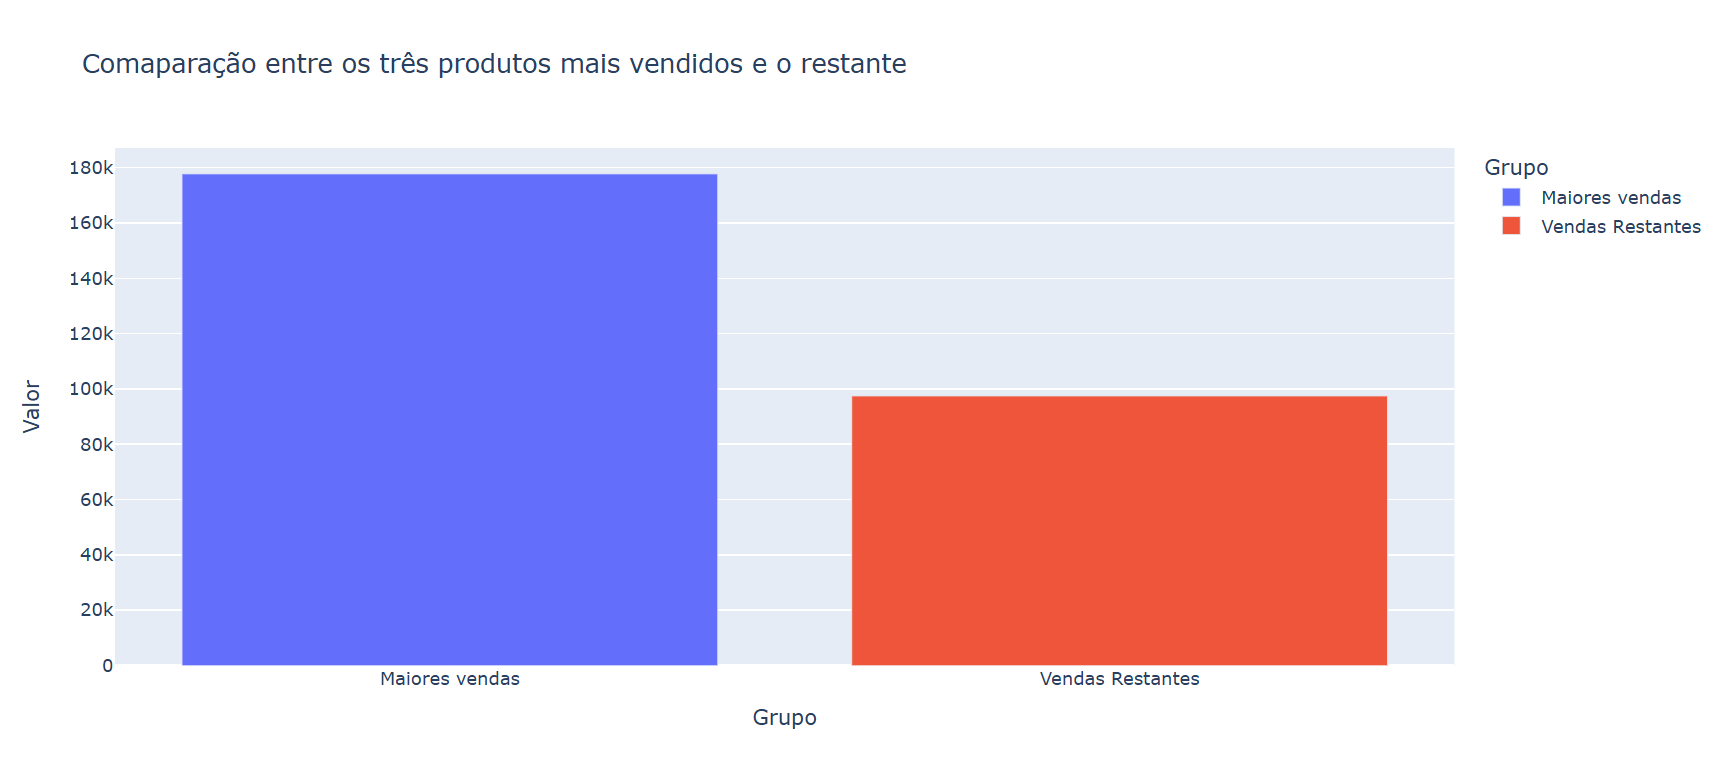

Aqui podemos ver que os três produtos mais vendidos formam quase o dubro do lucro do restante dos produtos

In [646]:
produtos_menos_vendidos = dados[dados['Produto'].isin(['Aalopuri', 'Panipuri', 'Pão de Batata','Suco de Cana', 'Cold coffee', 'Frankie', 'Sandwich'])]
comparatido_produtos_meses = produtos_menos_vendidos.groupby(['ano','mes', 'Produto'])['valor_transacao'].sum().reset_index()
display(comparatido_produtos_meses)

,ano,mes,Produto,valor_transacao
0,2022,4,Aalopuri,1360
1,2022,4,Cold coffee,2840
2,2022,4,Frankie,1550
3,2022,4,Panipuri,1340
4,2022,4,Pão de Batata,1780
...,...,...,...,...
79,2023,3,Frankie,4850
80,2023,3,Panipuri,2380
81,2023,3,Pão de Batata,1360
82,2023,3,Sandwich,6900


In [647]:
grafico_produtos_meses = px.line(comparatido_produtos_meses,
                                 x='mes',
                                 y='valor_transacao',
                                 color='Produto',
                                 facet_col='ano')
grafico_produtos_meses.show()

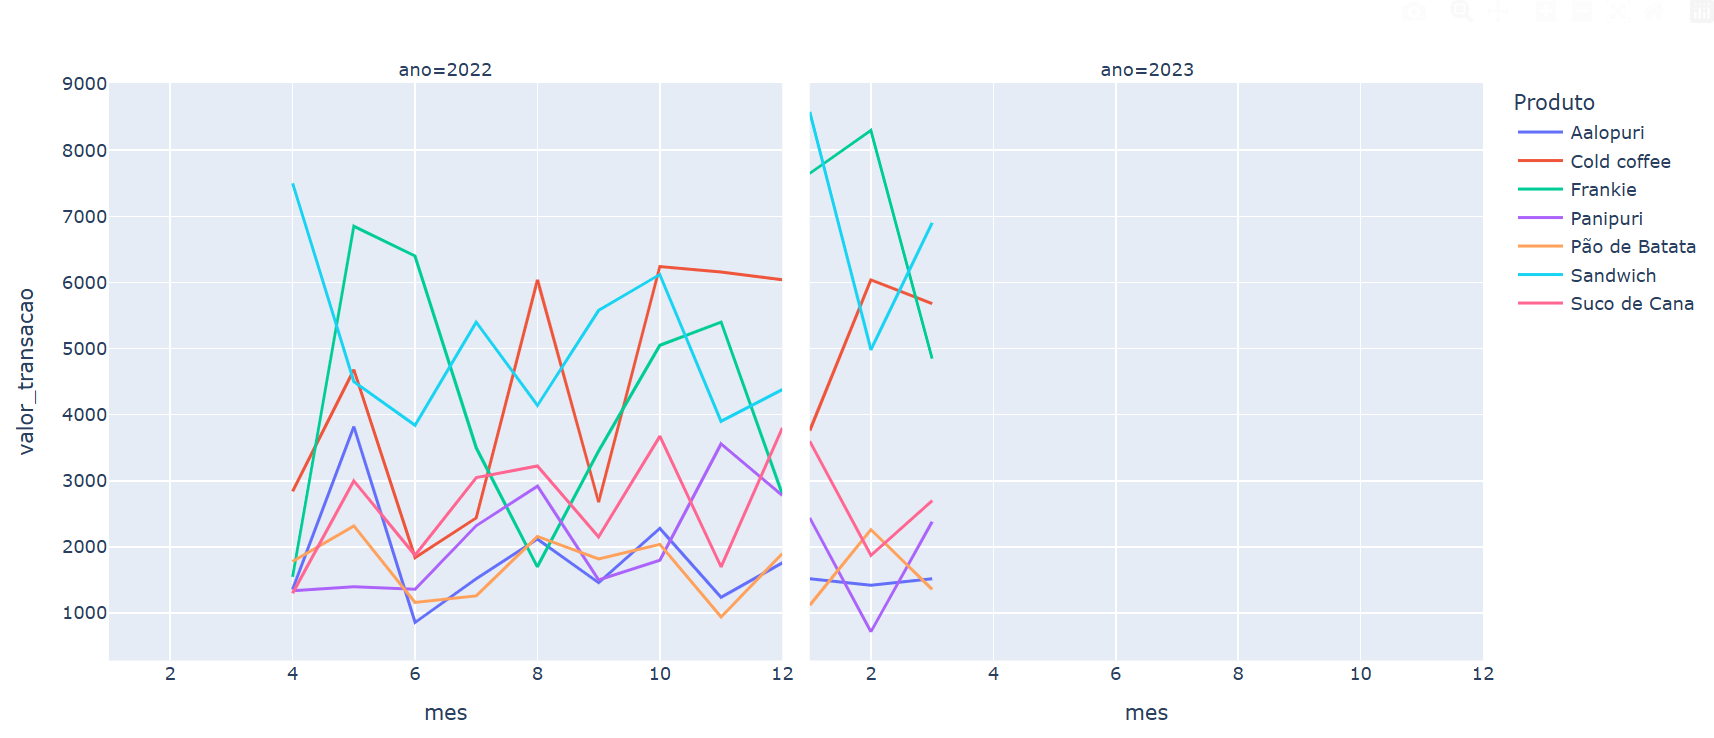

Após essa análise podemos ver que os três principais produtos são os unicos que utrapassam a faixa de 4000 durante o anos, os outros 4 produtos sempre perminesem abaixo de 4, com alguns produtos ficando abaixo dos 1000 em certos momentos

#Informações retiradas da análise



*   A venda de comidas rápida por vezes vendem 3 vezes mais que bebidas
*   Os mêses de Abril e Junhos foi um mês com um queda drastica nas vendas no ano anterior
*   Aproximadamente 2/3 do lucro do estabelecimento são obtidos com o capital de 3 produtos
*   Existema produtos no cardapio que nunca ficam em alta



#Sugestões

*   Criar estratégias para almentar o número de bebidas, como criar combos com bebidas e diversificar mais as bebidas
*   Realizar promoções e estabelecer melhores estrátegias de marketing nesses meses
*   Realizar modificações no cardapio, retirando produtos que costumam não sair e subistituindo pro produtos novos

